## Short Answer  
Please answer each of the following questions with **at least 2-3 complete sentences**. 

1. Why do we use a validation dataset during training, and what can the performance between the validation dataset and the training set tell us?

The validation data set is used to make sure that the network dosent memorize the specific individual features of each image.  The validation dataset does this by testing the network with images it has never seen before.  If your preformance in training is high, but your preformance in validation is low, than there is a good chance that your network is not actually learning consepts, but instead memorizing individual images.


2. What is the major difference between a fully-connected layer and a convolutional layer in terms of the scale of patterns they look for in their input?

A fully connected layer will examine each pixel of an image individually.  In contrast, a convolutional layer will look for certian features in an image by using a filter.  

3. If you performed 128 convolutions with filter size 3x3 and a stride of 1 on an input that is 100x100x64 and padded the inputs, what would the output shape be of this layer? 

100x100x128 

Height and width stay constant since there is padding, and there is a stride of one, however the last number (64) becomes 128
since 128 convolutions are preformed.





4. Matrix A has a shape of 250x200 and matrix B has a shape of 250x100. Can you perform a matrix multiplication between A and B in that order without performing any other operations first (True or False)?

False

5. Matrix A has a shape of 3x5 and matrix B has a shape of 3x5. Can these two matrices be added together elementwise (True or False)?

True


In [0]:
try:
  import tflearn
except ImportError:
  !pip3 install -q tflearn
  import tflearn

In [0]:
import numpy as np
import os
from google.colab import drive
from tflearn.layers.core import input_data, dropout, fully_connected
from scipy.misc import imread, bytescale, imresize # image manipulation functions
from tflearn.layers.conv import conv_2d
from tflearn.activations import relu
from tflearn.layers.normalization import batch_normalization as bn
from tflearn.layers.estimator import regression
from tflearn.data_utils import to_categorical
import matplotlib.pyplot as plt

In the line below, create a matrix full of zeros with 90 rows and 50 columns. Then print the row with index 5 in this matrix.

In [5]:
matrix1 = np.zeros([90,50])
matrow5 = matrix1[5, :]
print(matrow5)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [0]:
# load in the flowers dataset
import tflearn.datasets.oxflower17 as oxflower17
X, Y = oxflower17.load_data(one_hot=True, resize_pics=(100, 100))

In the line below, print the shapes of the data and labels. These shapes will help you later when defining the network.

In [7]:
print(X.shape, Y.shape)

(1360, 100, 100, 3) (1360, 17)


Below, show the image with index 500 in the dataset X.

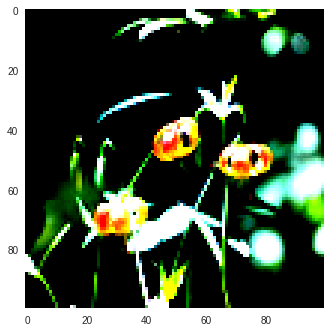

In [29]:
new_img = X[500, ...]
# view the original image
img_show = bytescale(new_img, 0, 1) # make values in new_img go between 0 and 1 to show it in matplotlib
plt.imshow(img_show)  # tell it what to show
plt.grid(False)  # get rid of the gridlines since this is not a graph
plt.show()  # show the image

In the line below, plot a histogram of X using an appropriate number of bins.

(array([1023807.,  859027.,  556376.,  805667.,  518191.,  773047.,
         511660.,  766909.,  515143.,  761728.,  760039.,  504322.,
         755636.,  504213.,  749644.,  495744.,  738940.,  493979.,
         738643.,  481943.,  715483.,  708261.,  466463.,  690962.,
         454340.,  675021.,  447417.,  661922.,  437363.,  645908.,
         631306.,  414497.,  611165.,  399699.,  592186.,  389096.,
         575654.,  378357.,  556008.,  364084.,  536543.,  528070.,
         345290.,  509525.,  329923.,  483146.,  315537.,  460295.,
         300994.,  439190.,  426596.,  278764.,  408848.,  266514.,
         393593.,  259049.,  382063.,  252132.,  367737.,  240572.,
         355003.,  348131.,  229329.,  339001.,  223084.,  332332.,
         218057.,  323622.,  215908.,  316346.,  313040.,  204700.,
         302313.,  198297.,  292725.,  190997.,  282838.,  187088.,
         279494.,  181900.,  272311.,  268920.,  172274.,  252521.,
         168751.,  240514.,  157318.,  229965., 

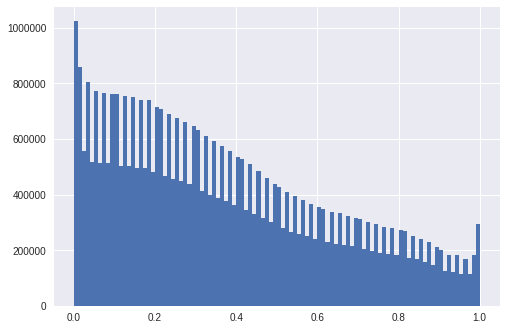

In [42]:
plt.hist(X.flatten(), bins = 100) # view histogram of X

In the line below, normalize the images by subtracting the mean and dividing by the standard deviation of every pixel. 

(array([4.010000e+02, 2.356000e+03, 4.584000e+03, 1.103200e+04,
        2.014700e+04, 3.031300e+04, 4.089500e+04, 5.369700e+04,
        6.850600e+04, 8.836800e+04, 1.147580e+05, 1.586380e+05,
        2.330830e+05, 3.123880e+05, 3.946120e+05, 4.782460e+05,
        5.161130e+05, 5.627130e+05, 7.333510e+05, 1.034948e+06,
        1.351510e+06, 1.316770e+06, 1.266913e+06, 1.224120e+06,
        1.196621e+06, 1.167060e+06, 1.145941e+06, 1.117175e+06,
        1.097288e+06, 1.075072e+06, 1.048848e+06, 1.027342e+06,
        1.001881e+06, 9.736890e+05, 9.455720e+05, 9.216670e+05,
        8.938410e+05, 8.681320e+05, 8.422260e+05, 8.188040e+05,
        7.916410e+05, 7.667290e+05, 7.393260e+05, 7.149370e+05,
        6.908400e+05, 6.686550e+05, 6.469800e+05, 6.256320e+05,
        6.050930e+05, 5.883380e+05, 5.712190e+05, 5.501390e+05,
        5.268620e+05, 5.116650e+05, 4.916030e+05, 4.738210e+05,
        4.542680e+05, 4.362160e+05, 4.022490e+05, 3.686810e+05,
        3.363160e+05, 3.004180e+05, 2.76

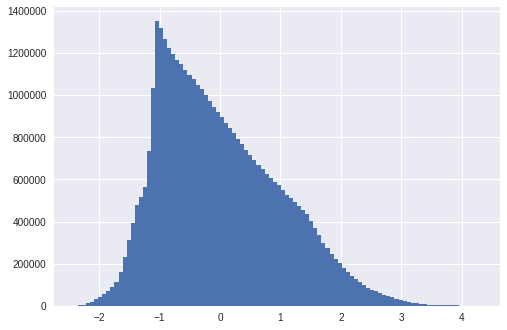

In [43]:
X -= np.mean(X, 0) # subtract the mean of each column from each value in that column
X /= np.std(X, 0)  # divide by standard deviation of that column  
plt.hist(X.flatten(), bins = 100) # view histogram of X

You will now create a convolutional neural network to predict the flower species from the images. In the line below, create an input layer for the network based on the shape of the images. 

In [0]:
# create input layer 
in_layer = input_data(shape = [None, 100, 100, 3])

In the line below, finish the line and create a convolutional layer to take in the input layer and slide 64 filters with shape 7x7 around it using the relu activation function. You might find the documentation for the conv_2d function helpful: http://tflearn.org/layers/conv/

In [36]:
# have 64, 7x7 filters 
conv1 = conv_2d(in_layer, 64, 7, activation = 'relu')
print(conv1.shape)

(?, 100, 100, 64)


In the line below, I have created a second convolutional layer which will take in the first convolutional layer's feature maps as input. Write a comment to indicate 1) how many filters this layer has, 2) what the filter size is, and 3) what the height and width of each output feature map should be based on the stride.

In [39]:
# 128 filters
# 3x3 filter shape
# 25x25 since stride=4 and 100/4 = 25
conv2 = conv_2d(conv1, 128, 3, activation='relu', strides=4)
print(conv2.shape)

(?, 25, 25, 128)


In the line below, replace the question marks with appropriate values, keeping in mind this will be the output layer of the network.

In [0]:
output_layer = fully_connected(conv2, 17, activation= 'softmax')



In the line below, remove the question mark and replace it with an appropriate value for the learning rate.

In [24]:
opt = regression(output_layer, optimizer='adam', learning_rate=0.001, loss='categorical_crossentropy')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


You don't need to do anything for the line below. 

In [0]:
model = tflearn.DNN(opt)

In the line below, replace each question mark with appropriate values and write a comment next to each line describing what it does (you only need to comment the lines I write *comment here* after.).

In [32]:
model.fit(X, # input data
          Y, # corrisponding labels
          validation_set=0.1, # use 10% of the images for validation
          show_metric=True, 
          n_epoch=10,  # number of times to go through the entire data set
          batch_size=75,  # go through the dataset 75 examples at a time
          snapshot_step=200)

Training Step: 219  | total loss: 0.03108 | time: 14.644s
| Adam | epoch: 015 | loss: 0.03108 - acc: 0.9951 -- iter: 0375/1224


KeyboardInterrupt: ignored

Download this notebook and upload it to your branch on the class github. 